Name: __________________ Class: __________________ Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/Astronomy/main/APBanner.png" alt='A&P Logo'>
</center>

# Planetary Interiors

### AIM - Visualise the interiors of planets, know how scientists build a picture of planetary interiors, explore the chemical composition of the Earth
Difficulty: Easy

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How do we know what the interiors of planets look like?  
2) Are all planets interiors the same? Are there differences between the rocky planets and the gas giants?      
2) What layers does the moon have? Is it similar to any of the planets?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [How do we know what's inside?](#How)
* [Composition of the Earth's Interior](#Comp)
* [Challenges](#Challenges)
* [References](#References)

# Let's go: Visualising Interiors <a class="anchor" id="Start"></a>

You have been provided with some data about the layers (and their depths) inside the planets. 

<div class="alert alert-block alert-success">Let's load this data now and look at what we've got:</div>

In [1]:
# run me
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# run me
file = 'structure.csv'
df = pd.read_csv(file)
df.head()

,object,color,layer_type,atm,name,color_simp,name_simp,depth_order,depth,depth_from_center,reference
0,moon,#5f2742,mechanical,n,inner core,#5f2742,inner core,0,240.0,240.0,https://solarsystem.nasa.gov/moons/earths-moon...
1,moon,#cb2855,mechanical,n,outer core,#cb2855,outer core,1,90.0,330.0,https://solarsystem.nasa.gov/moons/earths-moon...
2,moon,#e07625,mechanical,n,partial melt,#e07625,molten,2,150.0,480.0,https://solarsystem.nasa.gov/moons/earths-moon...
3,moon,#eabf80,mechanical,n,mantle,#eabf80,mantle,3,1176.0,1656.0,https://solarsystem.nasa.gov/moons/earths-moon...
4,moon,#e6dfcf,mechanical,n,crust,#e6dfcf,crust,4,81.5,1737.5,https://solarsystem.nasa.gov/moons/earths-moon...


We can see this file has information for each layer of the planets including the moon! The ```name``` gives us the name of the layer. The ```depth_order``` is the order of the layers starting in the centre (or the core) with zero. There are also colours for plotting.

The ```layer_type``` column tells us whether the layer is compositional or mechanical. Mechanical layers correspond the rock/materials (rheology) of the interior. Compositional layers can often be split into mechanical layers. The Earth's core can be split into two mechanical layers, the inner core which is solid, and the outer core which is liquid.
<div class="alert alert-block alert-success">
Try selecting just the layers for Mars below:</div>

In [3]:
# Your code here:
mars = df.loc[df['object'] == 'mars']
mars

,object,color,layer_type,atm,name,color_simp,name_simp,depth_order,depth,depth_from_center,reference
8,mars,#542a3e,compositional,n,core,#e07625,core,0,1800.0,1800.0,https://solarsystem.nasa.gov/planets/mars/in-d...
9,mars,#cc3b3a,compositional,n,mantle,#cc3b3a,mantle,1,1560.0,3360.0,https://solarsystem.nasa.gov/planets/mars/in-d...
10,mars,#e6dfcf,compositional,n,crust,#e6dfcf,crust,2,30.0,3390.0,https://solarsystem.nasa.gov/planets/mars/in-d...
11,mars,#9cbfab,compositional,y,atmosphere,#9cbfab,atmosphere,3,50.0,3440.0,https://solarsystem.nasa.gov/planets/mars/in-d...
12,mars,#542a3e,mechanical,n,core,#e07625,core,0,1800.0,1800.0,https://www.planetary.org/multimedia/space-ima...
13,mars,#D72638,mechanical,n,mesosphere,#D04D19,mesosphere,1,30.0,1830.0,https://www.planetary.org/multimedia/space-ima...
14,mars,#D04D19,mechanical,n,athenosphere,#F0A031,athenosphere,2,520.0,2350.0,https://www.planetary.org/multimedia/space-ima...
15,mars,#F0A031,mechanical,n,lisosphere,#E5D352,lisosphere,3,1010.0,3360.0,https://www.planetary.org/multimedia/space-ima...
16,mars,#e6dfcf,mechanical,n,crust,#e6dfcf,crust,4,30.0,3390.0,https://www.planetary.org/multimedia/space-ima...
17,mars,#9cbfab,mechanical,y,atmosphere,#9cbfab,atmosphere,5,50.0,3440.0,https://www.planetary.org/multimedia/space-ima...


Here we can see that Mars has four compositional layers and that the mantle can be split up into three mechanical layers based on differences in rheology throughout the mantle.

Let's select the compositional layers only for now and plot them. We won't plot a tradiational line or scatter graph. Instead we can use the matplotlib Circle patch to draw circles on our axes. You'll end up with a planet cross section with the smallest circle in the middle as the core etc.
<div class="alert alert-block alert-success">
Let's get the compositional layer values for Mars that we need for plotting:</div>

In [4]:
# Your code here:
# extract just Mars' compositional layers
mars = mars.loc[mars['layer_type'] == 'compositional']
# we will need the following columns: depth_from_center, depth_order, name, and color
depth_from_center = mars['depth_from_center'].values
colors = mars['color'].values
layers = mars['name'].values
# this one is done for you since we need to invert the depth order to pass to matplotlib's zorder argument
# a higher order for the core will make sure it isn't plotted over by the circles for the outer layers
zorders = mars['depth_order'].values[::-1] 

Excellent now we can start plotting. When we draw the circles we are going to specify a radius using the ```depth_from_center``` values. We will also scale the radii of the circles we draw by dividing each radius by the radius of the planet. This will make sure our plot is between ```(-1, 1)``` on both axes (this is not necessary but useful when making other more complicated plots). 

<div class="alert alert-block alert-success">
Complete the code below to make your first figure:
    </div>

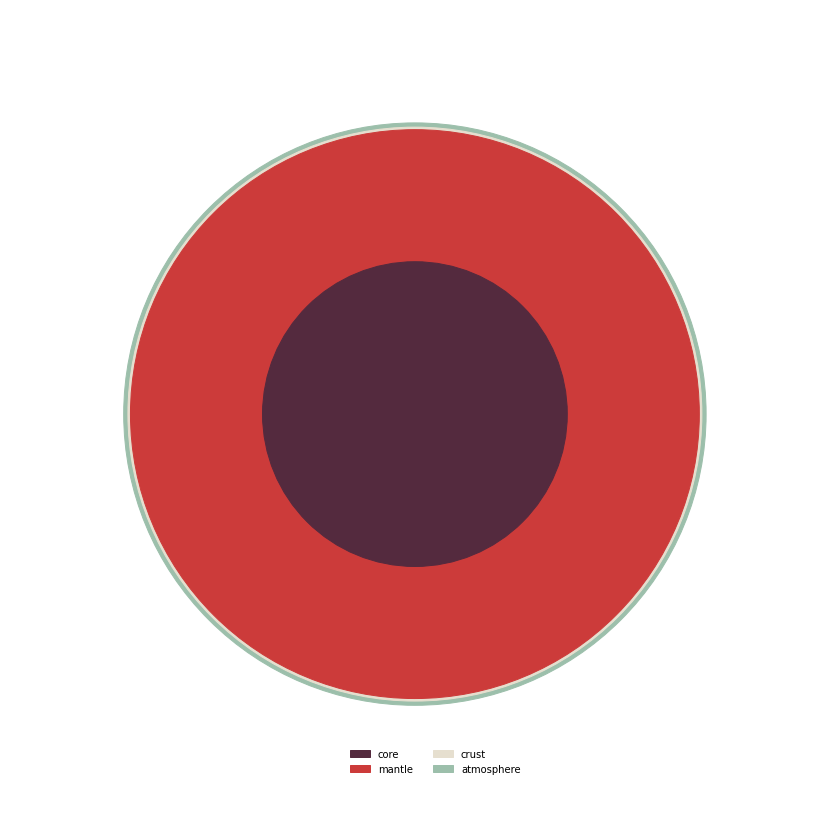

In [5]:
# Your code here:
radius = depth_from_center[-1]

# setup the figure and axes
fig = plt.figure(num=1, figsize=(15,15))
ax = plt.subplot()
mars_toScale = []

# for each layer in the mars dataframe
for i in range(len(mars)):
    # get the current depth_from_center value and divide it by the radius
    height = depth_from_center[i]/radius
    # create the circle patch
    circle = Circle((0, 0), height, color=colors[i], zorder=zorders[i], label=layers[i])
    # add it to the axis
    ax.add_artist(circle)
    # append the patch to our list, we'll use this to construct our legend later
    mars_toScale.append(circle)

# here do 4 things: set axes limits of -1.4 to +1.4, set the aspect of each axes to be equal
#   turn the axis off so we don't see the numbers or lines, and add a legend
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.set_aspect('equal')
ax.axis('off')
ax.legend(mars_toScale, layers, loc='upper center', bbox_to_anchor=(0.525, 0.1), ncol=2, frameon=False)

So cool! The crust is very thin compared to the mantle and the core. 

<div class="alert alert-block alert-success">
    Use the save button to save the figure or run the code below with an appropriate name.
</div>

In [6]:
plt.savefig('./your_figures/NAME.png', dpi=200)

<Figure size 432x288 with 0 Axes>

Now try these two tasks:

<div class="alert alert-block alert-success">

1) Plot the compostional layers for the other planets using the code above. Are there any similarities/differences?  
Hint: You can just change the third code block where we selected the object and re run the rest of the above code.

2) Plot the mechanical layers for the rocky planets (and the moon). Does each rocky planet have the same mechanical layers? Can you explain the differences?
    </div>

When you've finished run the code below to see some images made with **structure_plots.py** and check to see whether your observations match mine:

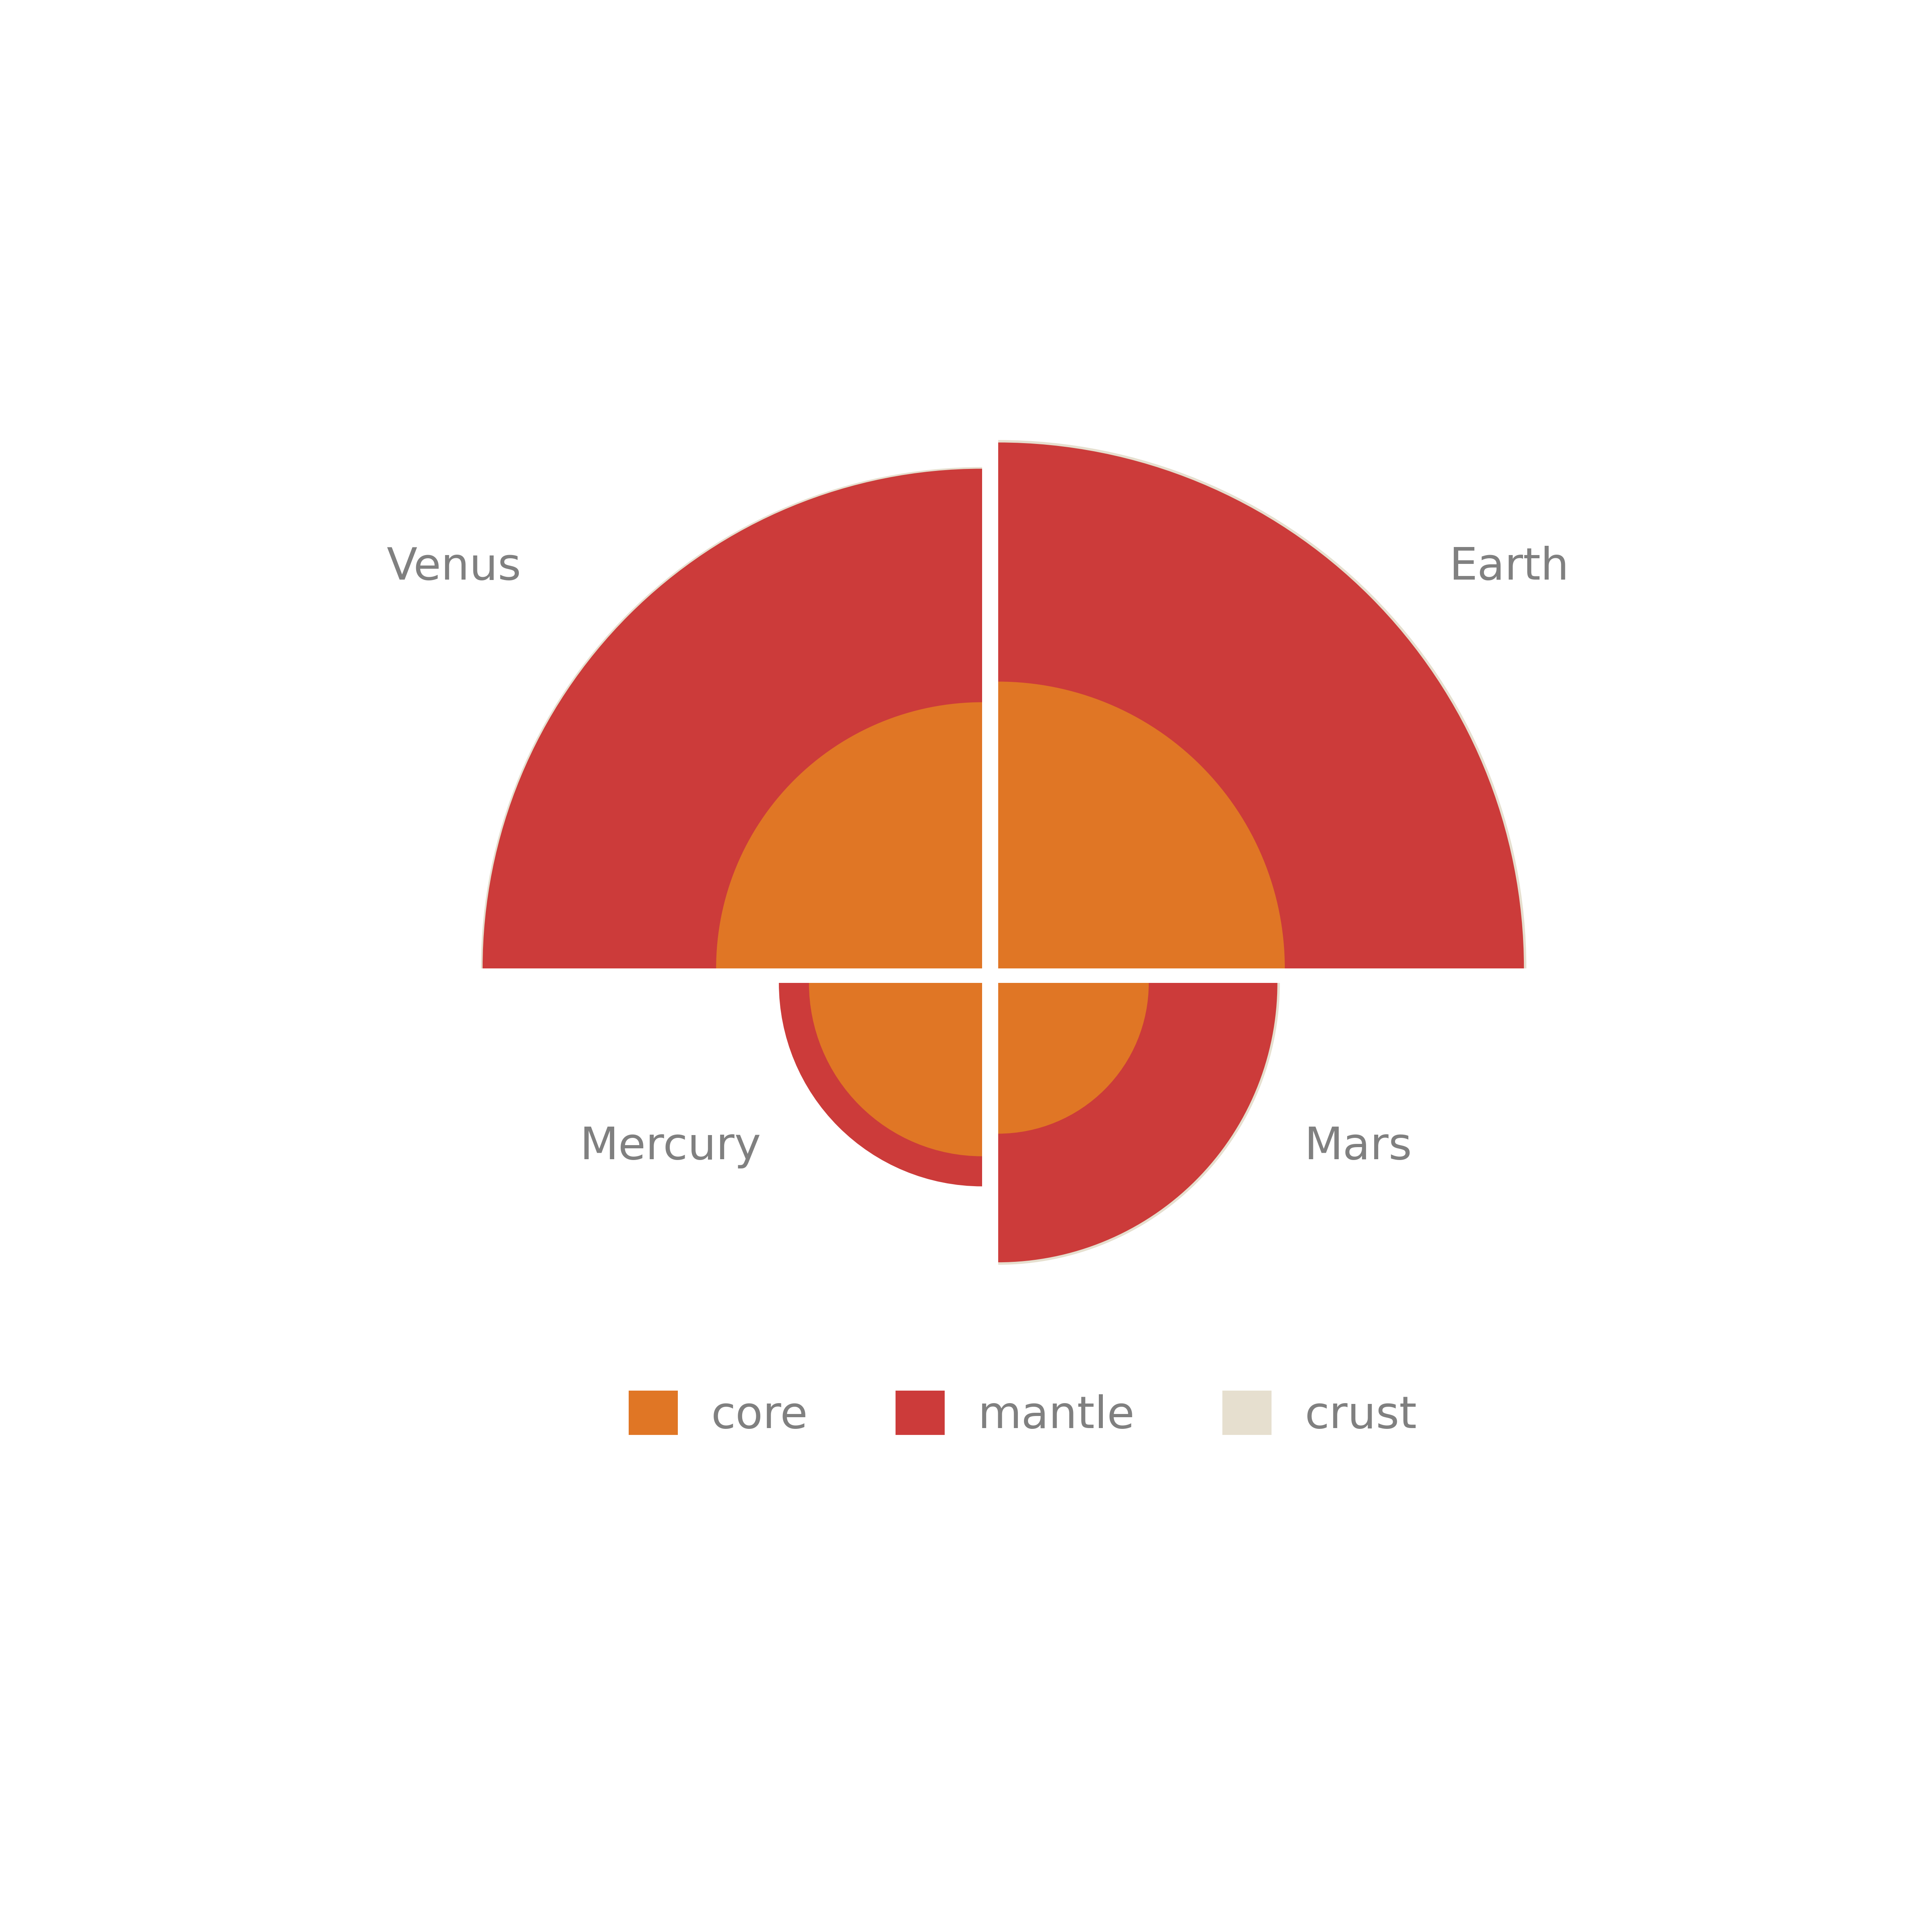

In [7]:
# run me
Image('./figures/rocky_interiors_compositional_simpLegend.png')

This graphic shows the relative sizes of compositional layers in the rocky planets. All of them have a core, mantle, and crust. The cores seem to be a similar size, relative to the radius of the planet except for Mercury which has a giant metallic core.

The cores are all primary iron (with Mercury having the highest iron content in its core). The rest of the rocky planets are metals, silicates (like silicon dioxide or quartz in its common form), and sulphides.

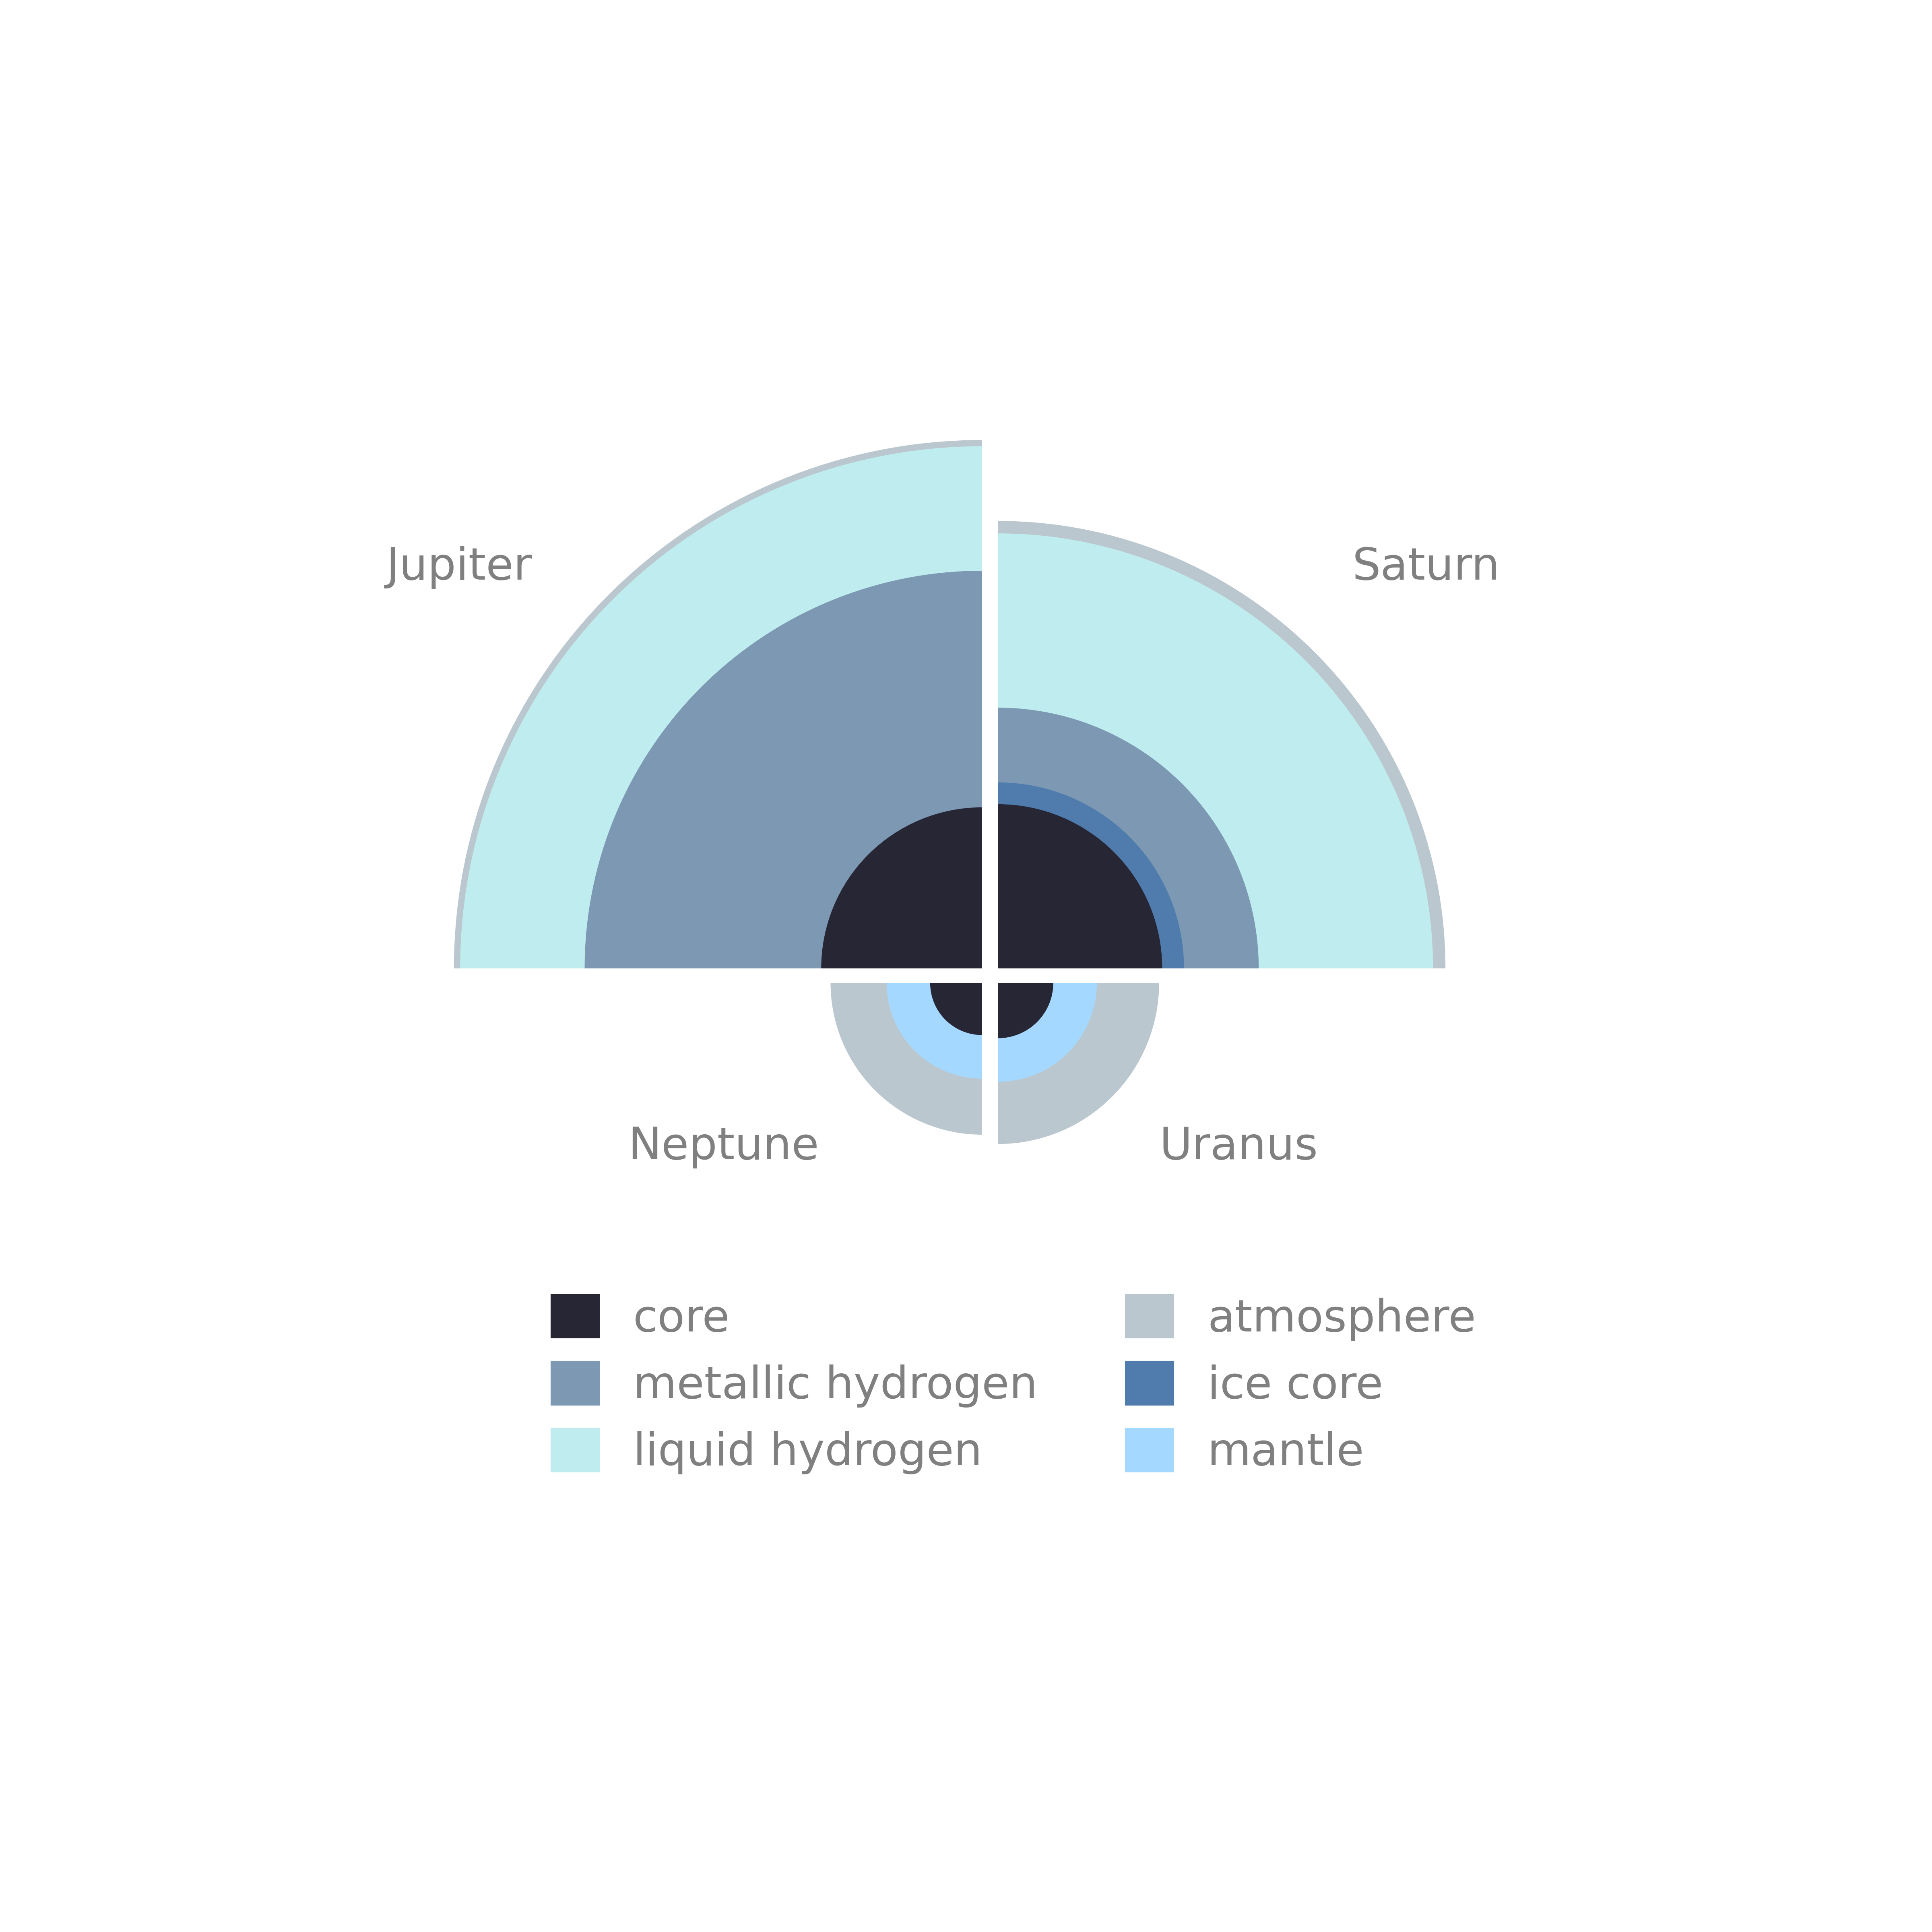

In [8]:
# run me
Image('./figures/ice_giant_interiors_compositional.png')

This graphic shows the layers for the gas giants. Notice the difference between the two gas giants, Jupiter and Saturn, and the ice giants, Neptune and Uranus. Jupiter and Saturn are both large enough to compress hydrogen into its metallic form. Notice the cores of each pair are similar in size.

The giant planets mimic the composition of the sun although they may have rocky cores. Jupiter and Saturn are roughly 75% hydrogen and 25% helium with ices of water, methane, nitrogen, and carbon dioxide to name a few.

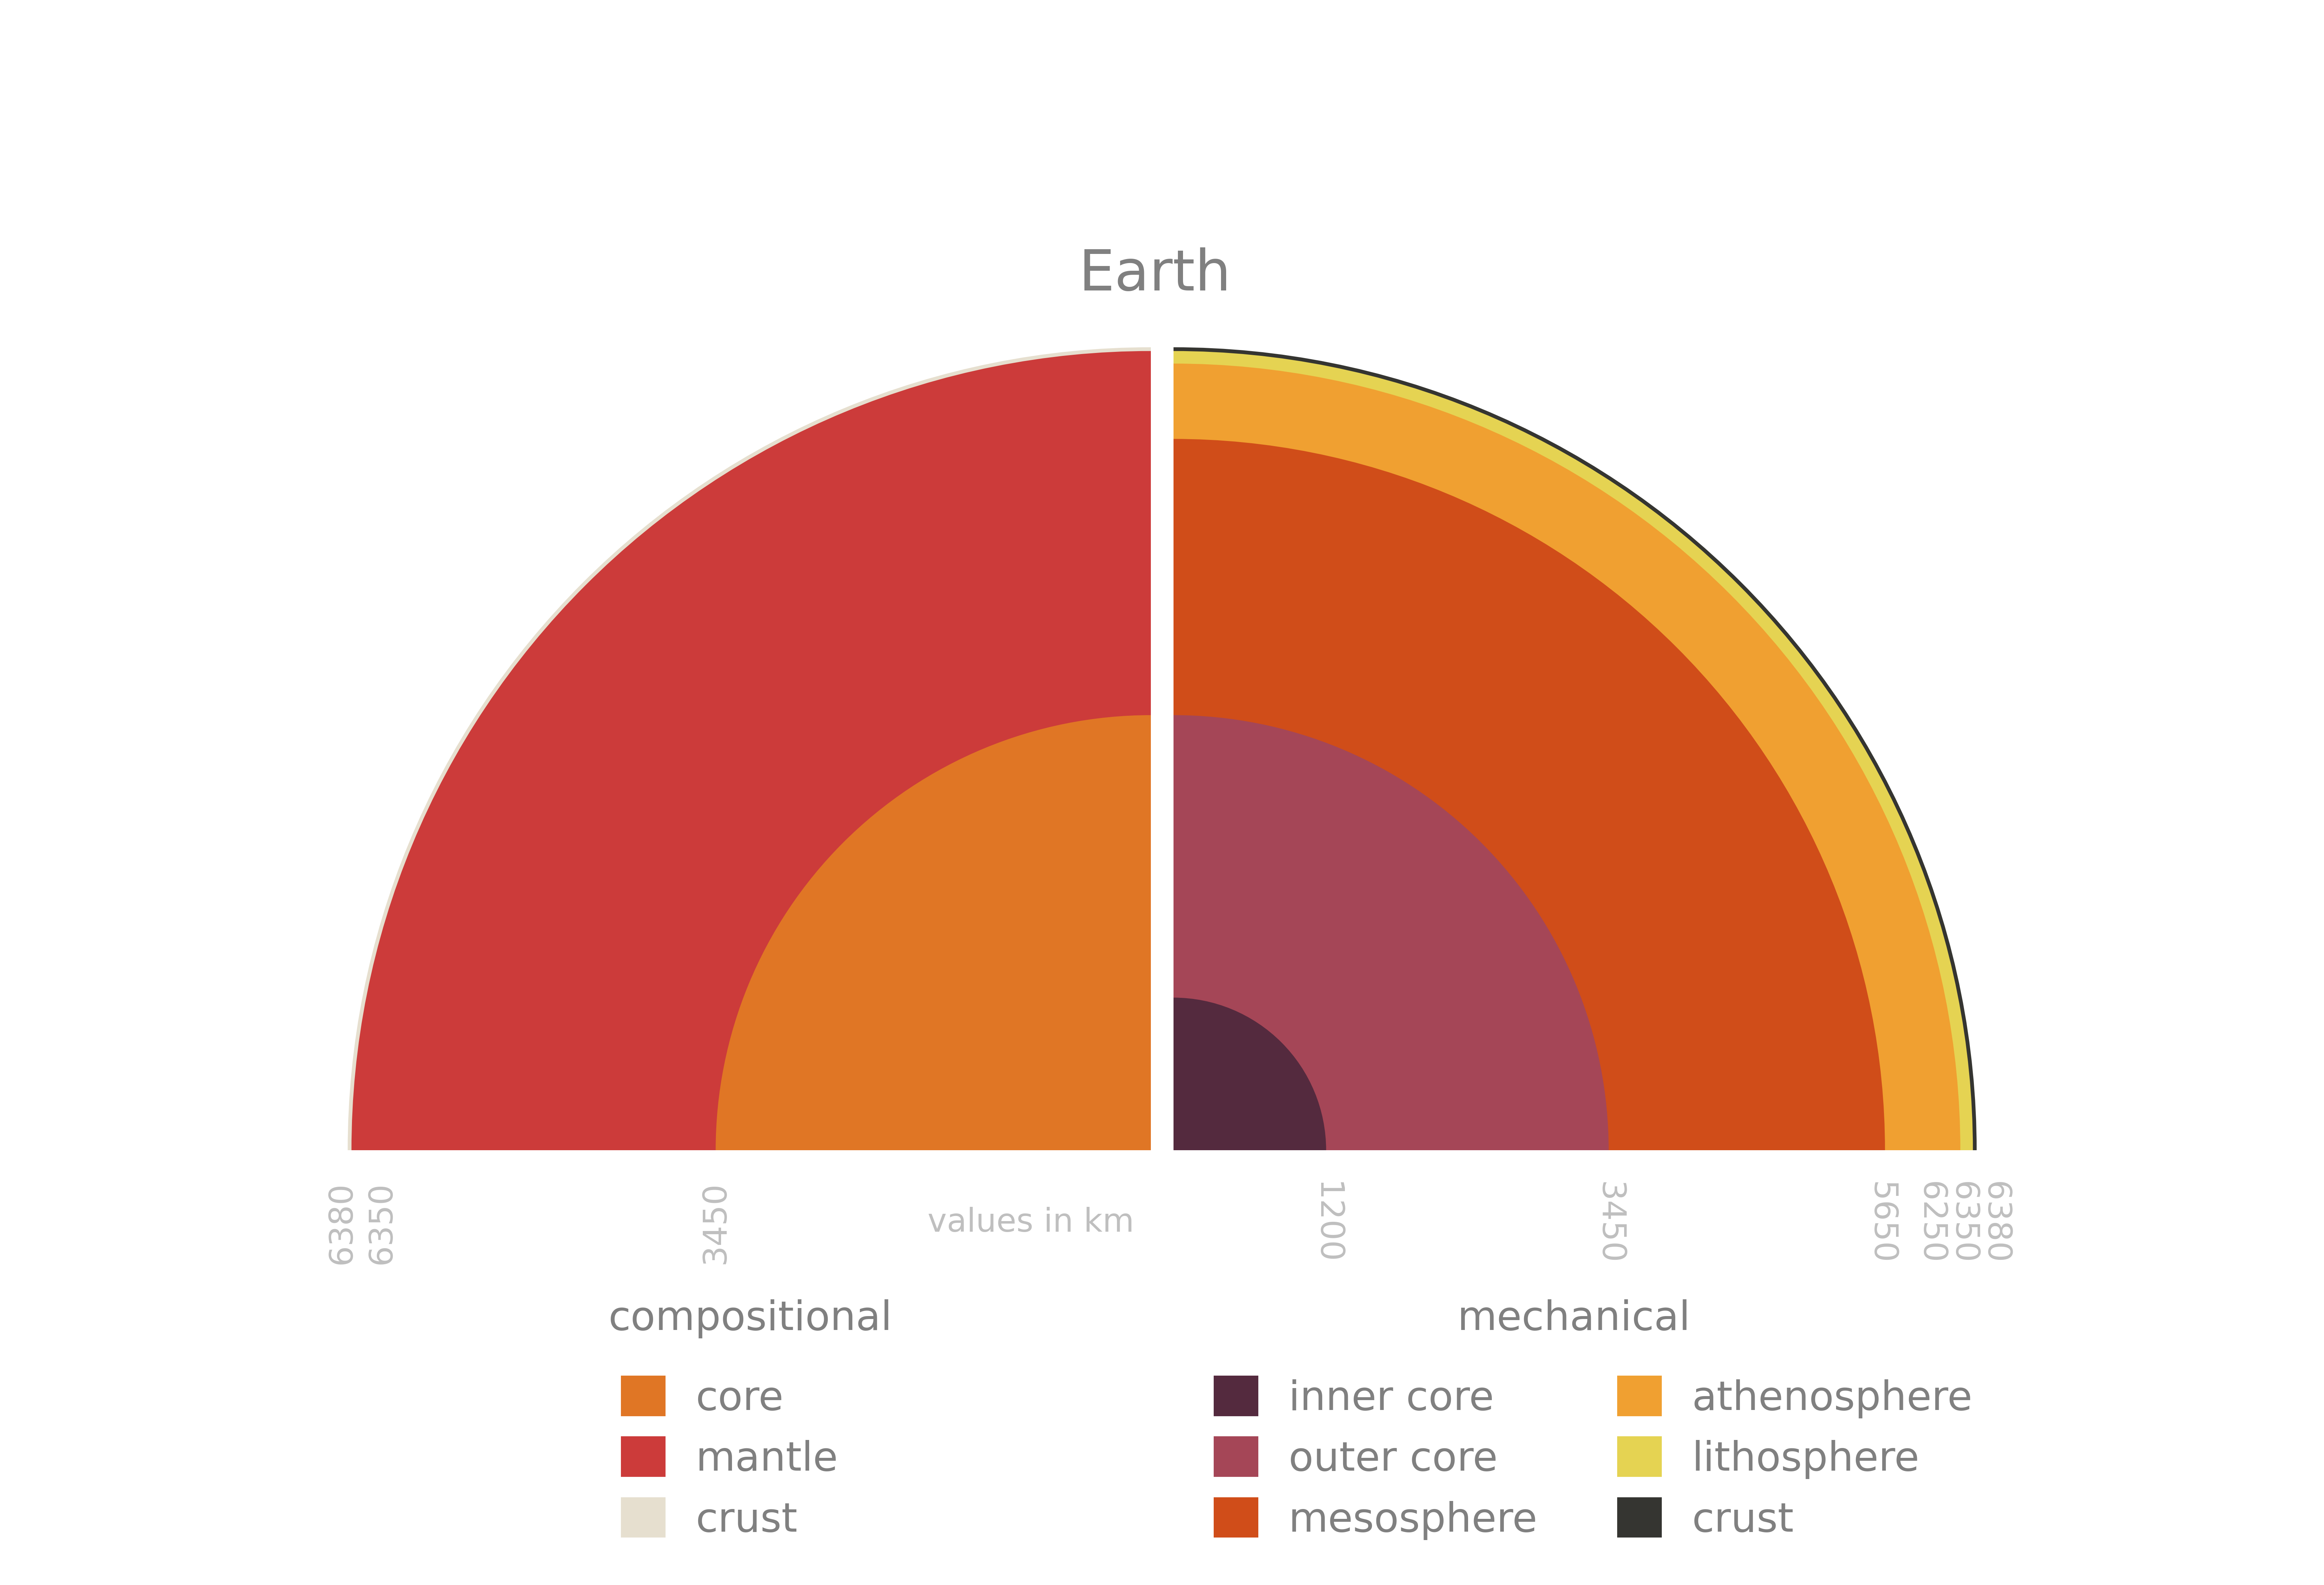

In [9]:
# run me
Image('./figures/comp_vs_mech/earth_comp_vs_mech.png')

This graphic shows the difference in compositional and mechanical layers for the Earth. Note here I have not displayed a difference between oceanic and continental crust (which is much thicker than oceanic crust). The core is split into the inner and outer core, the outer core being liquid and the inner solid. Likewise the mantle is split into three layers. The mesosphere where convection occurs (but the material is still solid), the athenosphere which is a less fluid region of weaker rock, and the lithosphere (which technically includes the crust) and is rigid. Layer boundaries are defined by properties such as the speed of seismic waves through the material.

## How do we know what's inside? <a class="anchor" id="How"></a>

The picture of planetary interiors comes from the combination of multiple pieces of data:

1) Seismic waves tell us about changes in materials with depth and that the outer core is liquid since p (shear) waves can't travel through it.  
2) We can calculate the density and mass of the planet from its iteractions with other planets and satellites.  
3) We know the overall composition of the planets since it should be similar to the material the sun was made from and chondrites which are a class of meteorite unchanged since the formation of the solar systems.  
4) We know the composition of the crust and upper mantle from samples of rocks.  
5) We can work out the main materials in the lower layers by exerting minerals to very high pressures and temperatures in a lab.  
6) The Earth has a magnetic field so it must have a liquid layer of metallic elements.  
7) We can compare the composition of the crust to that of the mantle and core to work out where certain elements are concentrated.  

We know from our models of planet formation that planets undergo chemical differentiation when forming. This is when the heavier elements fall to the planets centre and the lighter rise to the top as the planet is still molten. Differentiation stops when the planet has cooled enough. We will look deeper into the chemical composition of the Earth's interior in a later notebook.

# Composition of the Earth's Interior <a class="anchor" id="Comp"></a>

Let's look a bit at the composition of the Earth's interior since we know the most about it. The file **earth_chem_interior.csv** has some data on the elemental compostion of the Earth's layers and **earth_chem_crust.csv** has a more detailed break down for just the continental crust.

<div class="alert alert-block alert-success">
Load the first csv and take a look at the data using the pandas function ```head()```.
</div>

In [10]:
# Your code here:
file2 = 'earth_chem_interior.csv'
df2 = pd.read_csv(file2)
df2.head()

,name,O,Si,Al,Mg,Fe,Ca,K,S,Na,Ti,Ni,Mn,Cr,Co,P
0,bulk,32.436,17.221,1.507,15.866,28.176,1.607,0.0192,0.701000,0.2490,0.0710,1.6147,0.2600,0.4429,0.0870,0.11240
1,core,4.100,7.350,NaN,NaN,79.390,NaN,NaN,2.300000,NaN,NaN,4.8700,0.5820,0.7779,0.2253,0.36900
2,lower mantle,NaN,22.480,1.330,21.310,6.080,1.480,0.0014,0.000119,0.0359,0.0830,0.2110,0.1010,0.2500,0.0105,0.00906
3,upper mantle,NaN,22.200,3.650,18.670,6.180,3.890,0.0475,0.015800,0.6004,0.2159,0.1610,0.1029,0.1969,0.0091,0.01700
4,crust,46.600,27.700,8.100,2.100,5.830,3.600,2.6000,0.107400,2.8000,4.8000,0.0020,1.1000,0.0055,0.0025,1.05000


Here we have the composition of some layers of the Earth and the percentage composition of the element. Note some data is missing and is represented by a ```NaN``` or Not a Number! The bulk row gives the overall composition for the Earth.

<div class="alert alert-block alert-success">
Let's look at a few elements, Si, Fe, and Ni. Get the values for their percentage of the total below and plot them on a bar chart:
    </div>

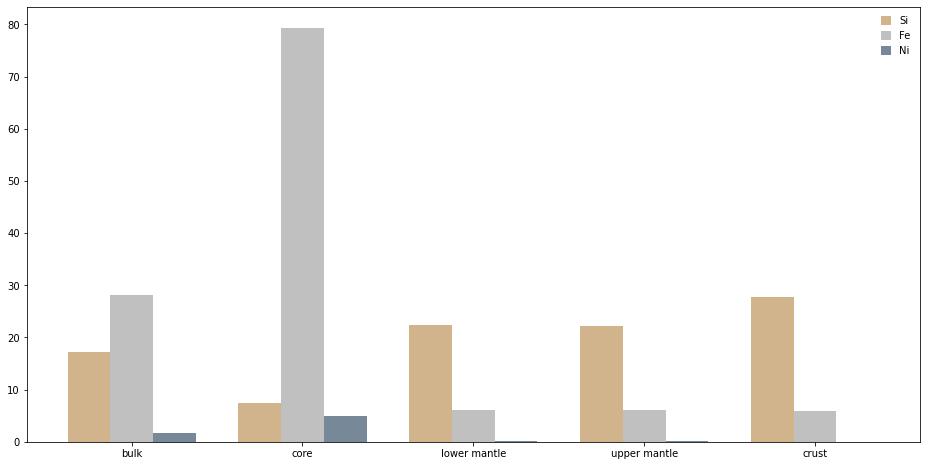

In [11]:
# Your code here:
names = df2['name'].values
Si = df2['Si'].values
Fe = df2['Fe'].values
Ni = df2['Ni'].values

fig = plt.figure(num=2, figsize=(16, 8))
ax = plt.subplot()

X = np.arange(len(names))-1
width = .25
bar1 = ax.bar(X - width, Si, color='tan', width=width, label='Si')
bar2 = ax.bar(X, Fe, color='silver', width=width, label='Fe')
bar3 = ax.bar(X + width, Ni, color='lightslategray', width=width, label='Ni')
plt.xticks(X, tuple(names))

leg = ax.legend(frameon=False, handlelength=1, handleheight=1)

Notice how the amount of silicon generally increases the further away from the core the layer is? That most of the iron is concentrated in the core as is the nickel. Remember the Earth underwent differentiation when it formed? And heavier elements sunk to the centre? That's what happened to most of the iron and nickel.

<div class="alert alert-block alert-success">
Plot some more elements from our csv. Which ones increase in abundance towards the crust?
    </div>

In [12]:
# make another bar chart and try to find an element whose abundace is highest in the crust
# Your code here:



The second csv file has a more comprehensive list of elemental abundances but only for the continental crust.
<div class="alert alert-block alert-success">
Try plotting that data and making a graph of abundance versus atomic number (z). You should see a pattern like the one in the figure below.</div>

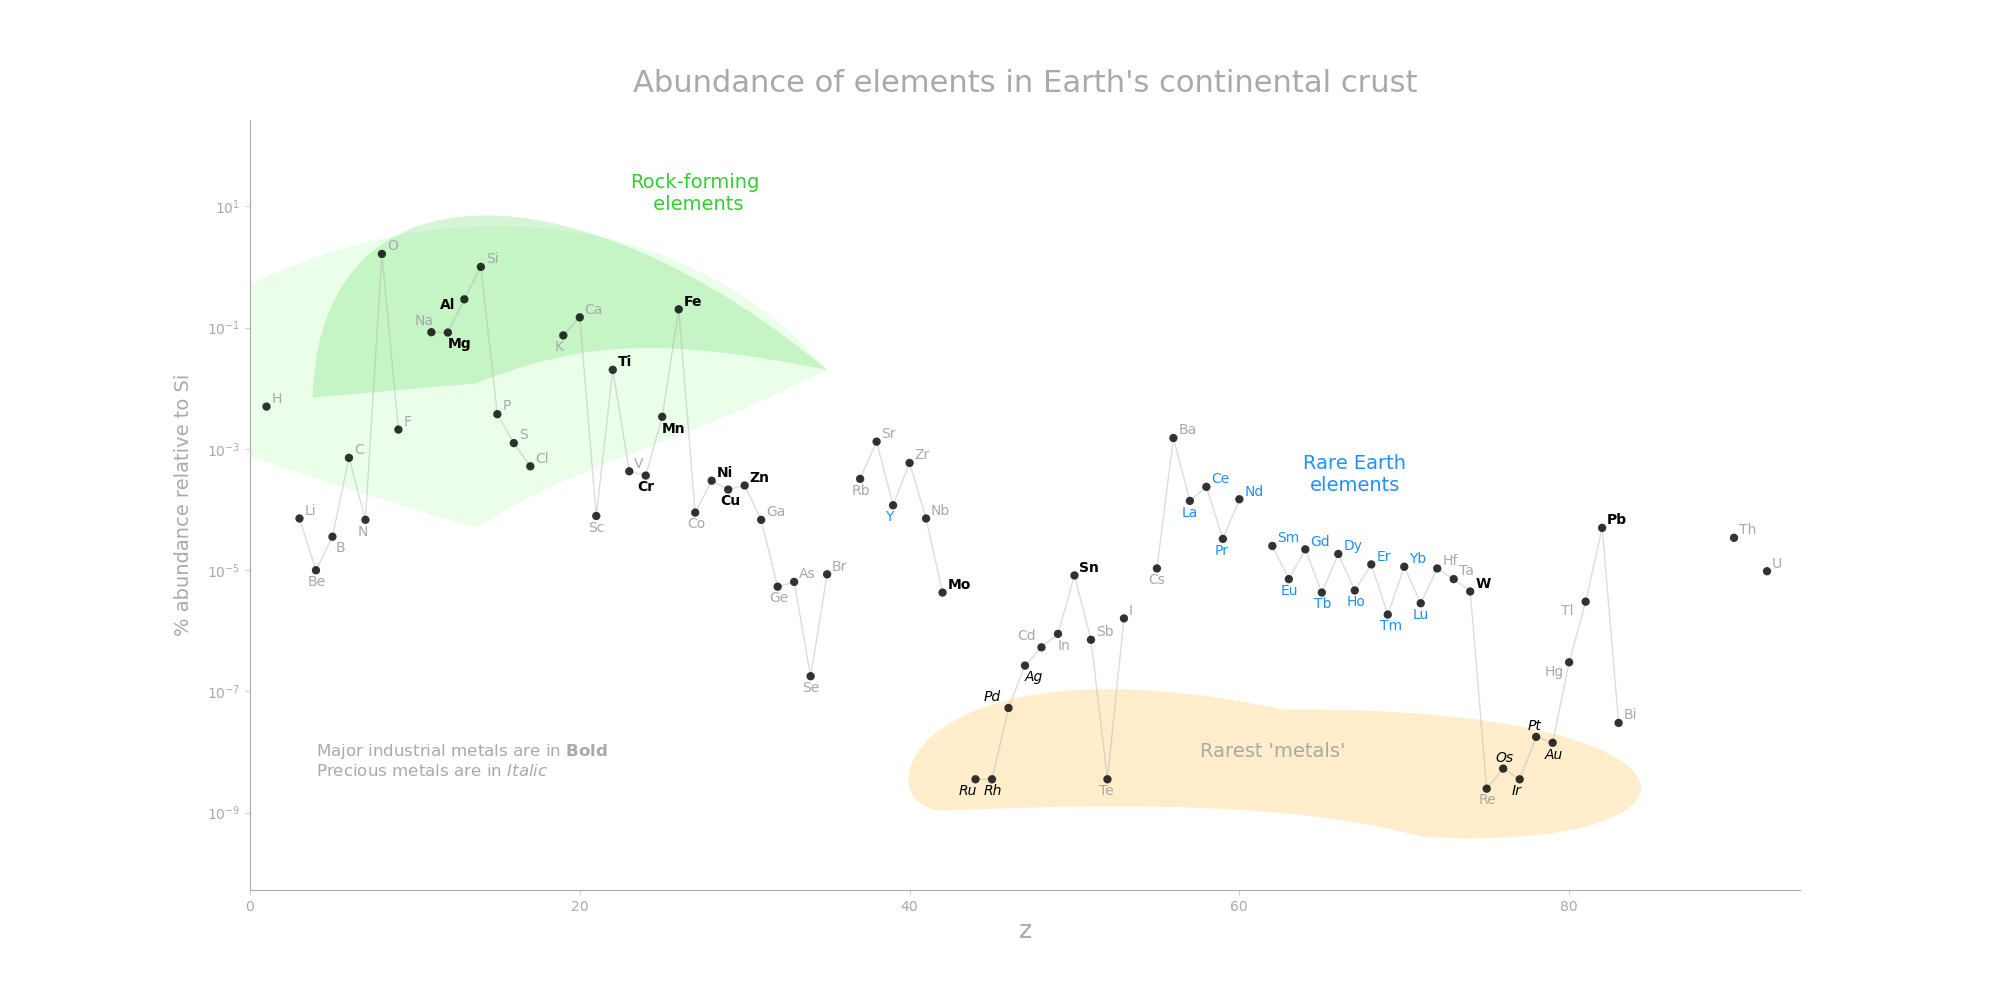

In [13]:
# run me
Image('./figures/elem_comp_crust_earth.png')

# Challenges <a class="anchor" id="Challenges"></a>

1) Re-create any of the images above (my code can be found in **structure_plots.py** if you need help).  
2) Find data for the Galilean Moons and make similar interior plots for them.  
3) Make a plot that shows the difference between oceanic and continental crust clearly.  
4) Plot some chemical data for the moon and other rocky planets using Chapter 8 of Planetary Science: A Lunar perspective [here](https://www.lpi.usra.edu/publications/books/planetary_science/chapter8.pdf)

# References <a class="anchor" id="References"></a>

Ken Rubin - How do scientists know what's in the core of the Earth? [https://www.soest.hawaii.edu/GG/ASK/earths_core.html](https://www.soest.hawaii.edu/GG/ASK/earths_core.html)  
Eleanor Lutz- Topographic Maps of the Planets and Moons, [https://github.com/eleanorlutz/topography_atlas_of_space](https://github.com/eleanorlutz/topography_atlas_of_space)  
Katharina Lodders - Composition of planets and properties of protoplanetary disks (2009), [https://www.tat.physik.uni-tuebingen.de/~fgp/Conf09/Contributions/talk_Lodders_Tuebingen09.pdf](https://www.tat.physik.uni-tuebingen.de/~fgp/Conf09/Contributions/talk_Lodders_Tuebingen09.pdf)

# Acknowledgements

Thanks to Cameron Davidson for his help identifying the difference between compositional and mechanical layers and sending over helpful figures [https://apps.carleton.edu/profiles/cdavidso/](https://apps.carleton.edu/profiles/cdavidso/).

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/astroDimitrios/Astronomy 